In [1]:
from Scripts import ScriptOptions 
import os

params= ScriptOptions(
    ImageFolder= r"D:\other_datasets\selective_colorization",
    model='big', #Ещё есть convnext, swinv2, big, vit
    gen_threshold=0.25, #увереность для общей картинки/и если не установлено значение в конфиге yolo моделей то для них тоже
    char_threshold=0.75, # Увереность для персонажей, теги персонажей берутся только из полной области, по причине я так захотел
    batch=2,
    recursive=False,
    save_txt=True,
    append_txt=True,
    add_tags_before="selective colorization",
    add_tags_after="",
    remove_tags="",
    detectors_config="detectors-Copy1"
)



In [2]:
from Scripts import BatchTagging
result = BatchTagging(params)

Файл config.json уже существует в models\taggers\wd-eva02-large-tagger-v3
Файл selected_tags.csv уже существует в models\taggers\wd-eva02-large-tagger-v3
Загрузка модели тегирования 'big' из 'SmilingWolf/wd-eva02-large-tagger-v3'...
Loading model from models\taggers\wd-eva02-large-tagger-v3\model.safetensors using safetensors
Загрузка списка тегов...
Загрузка тегов из локального файла: models\taggers\wd-eva02-large-tagger-v3\selected_tags.csv
Создание трансформации данных...
Загрузка конфигурации детекторов из detectors-Copy1...
Файл конфигурации детекторов не найден: detectors-Copy1
YOLO-детекторы не будут использоваться
Всего изображений для обработки: 83

Обработка изображения 1/83: D:\other_datasets\selective_colorization\Araragi.Koyomi.full.975353.jpg
Обновлено 16 новых тегов в D:\other_datasets\selective_colorization\Araragi.Koyomi.full.975353.txt
--------
Путь к изображению: D:\other_datasets\selective_colorization\Araragi.Koyomi.full.975353.jpg

Результаты для полного изображен

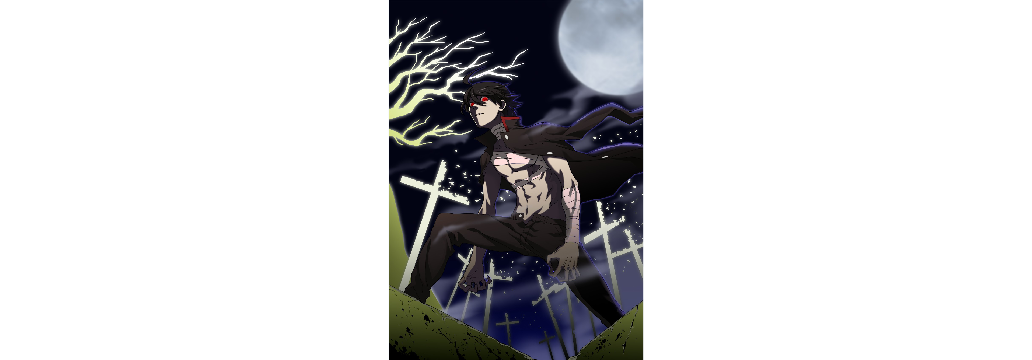

Информация о изображении #1: D:\other_datasets\selective_colorization\Araragi.Koyomi.full.975353.jpg

Объединенные теги:
selective colorization, 1boy, abs, ahoge, bandages, bare tree, black hair, black pants, closed mouth, cross, from below, full moon, gakuran, glowing, glowing eyes, hair between eyes, jacket, jacket on shoulders, looking at viewer, male focus, moon, muscular, naoetsu high school uniform, navel, night, night sky, open clothes, open fly, open jacket, outdoors, pants, red eyes, school uniform, short hair, sky, solo, standing, toned, toned male, topless male, tree, unbuttoned, wind

Теги без включения yolo моделей:
1boy, red eyes, male focus, bandages, moon, solo, black hair, cross, naoetsu high school uniform, glowing eyes, pants, glowing, full moon, jacket on shoulders, jacket, night, ahoge, school uniform, tree, topless male, open clothes, open fly, black pants, abs, sky, gakuran, outdoors, standing, night sky, bare tree, navel, hair between eyes, wind, unbuttoned, sho

In [3]:
from Scripts import view_image_results
view_image_results(result, 0, visualize=True, save_visualization=False, verbose=True)

In [5]:
from pathlib import Path
from Scripts.tag_manager import TagManager

manager = TagManager()

manager.load_from_folder("D:\other_datasets\selective_colorization", recursive=True)  # recursive=True для поиска в подпапках


# Remove redundant subtags
removed_tags = manager.remove_redundant_subtags()
    
# Save changes if any tags were removed
if removed_tags > 0:
    manager.save_changes()
    
print("Обработка завершена!")

<>:6: SyntaxWarning:

invalid escape sequence '\o'

<>:6: SyntaxWarning:

invalid escape sequence '\o'

C:\Users\liali\AppData\Local\Temp\ipykernel_12876\4246392247.py:6: SyntaxWarning:

invalid escape sequence '\o'



Загружено 85 файлов с тегами
В файле D:\other_datasets\selective_colorization\Araragi.Koyomi.full.975353.txt найдены избыточные теги: ['glowing', 'jacket', 'moon', 'night', 'pants', 'school uniform', 'sky', 'toned', 'tree']
В файле D:\other_datasets\selective_colorization\Gaen.Izuko.full.1587950.txt найдены избыточные теги: ['gloves', 'headphones']
В файле D:\other_datasets\selective_colorization\Kiss-shot.Acerola-orion.Heart-under-blade.full.1016973.txt найдены избыточные теги: ['long hair', 'blood', 'breasts', 'gloves', 'ribbon', 'tongue']
В файле D:\other_datasets\selective_colorization\Kiss-shot.Acerola-orion.Heart-under-blade.full.1961079.txt найдены избыточные теги: ['legs', 'tree']
В файле D:\other_datasets\selective_colorization\Monogatari.full.84714.txt найдены избыточные теги: ['school uniform', 'shirt']
В файле D:\other_datasets\selective_colorization\Monogatari.full.946450.txt найдены избыточные теги: ['breasts', 'hair ornament', 'shorts']
В файле D:\other_datasets\selectiv

In [ ]:
# Add tags to the beginning and end
count = manager.add_tags(
    add_tags_before="high quality, best quality", 
    add_tags_after="digital art"
)
print(f"Добавлены теги в {count} файлов")
manager.save_changes()

# Remove unwanted tags
count = manager.remove_tags("low quality, worst quality")
print(f"Удалены теги из {count} файлов")
manager.save_changes()

# Replace tags
count = manager.replace_tag("1girl", "woman")
print(f"Заменены теги в {count} файлов")
manager.save_changes()

# Sort tags with important ones first
important_tags = ["masterpiece", "high quality", "best quality", "ultra detailed"]
count = manager.sort_tags(alphabetical=True, importance=important_tags)
print(f"Отсортированы теги в {count} файлов с приоритетом важных тегов")
manager.save_changes()

# Find files with specific tags
files = manager.find_files_with_tag("portrait")
print(f"Найдено {len(files)} файлов с тегом 'portrait'")

# Process only these files
if files:
    count = manager.add_tags(add_tags_after="close-up", files=files)
    print(f"Добавлен тег 'close-up' к {count} портретам")
    manager.save_changes(files=files)